In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from model_trainer import LabelTransferTrainer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/storage/Storage/single_cell_env/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
datasets = pd.read_csv('datasets.csv')
datasets = datasets[~datasets['study_id'].isin(['Ho2020M', 'Ho2020F'])]

In [3]:
trainer = LabelTransferTrainer(hyperparams_file='hyperparams.csv',
                               data_dir='exported_matrices',
                               output_dir='label_transfer_model_output',
                               verbose=False,
                               random_seed=12345)

trainer.save_models_plots()

# Hyperparameter tuning

In [4]:
trainer.train_all_models(epochs=200)

Training model Allensworth2021F...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Training model Cheung2018M...
Training model Fletcher2019F...
Training model Fletcher2019M...
Training model Kucka2021F...
Training model Lopez2021M...
Training model Mayran2019M...
Training model Ruf_Zamojski2021F...
Training model Ruf_Zamojski2021M...
Training model Vennekens2021M...


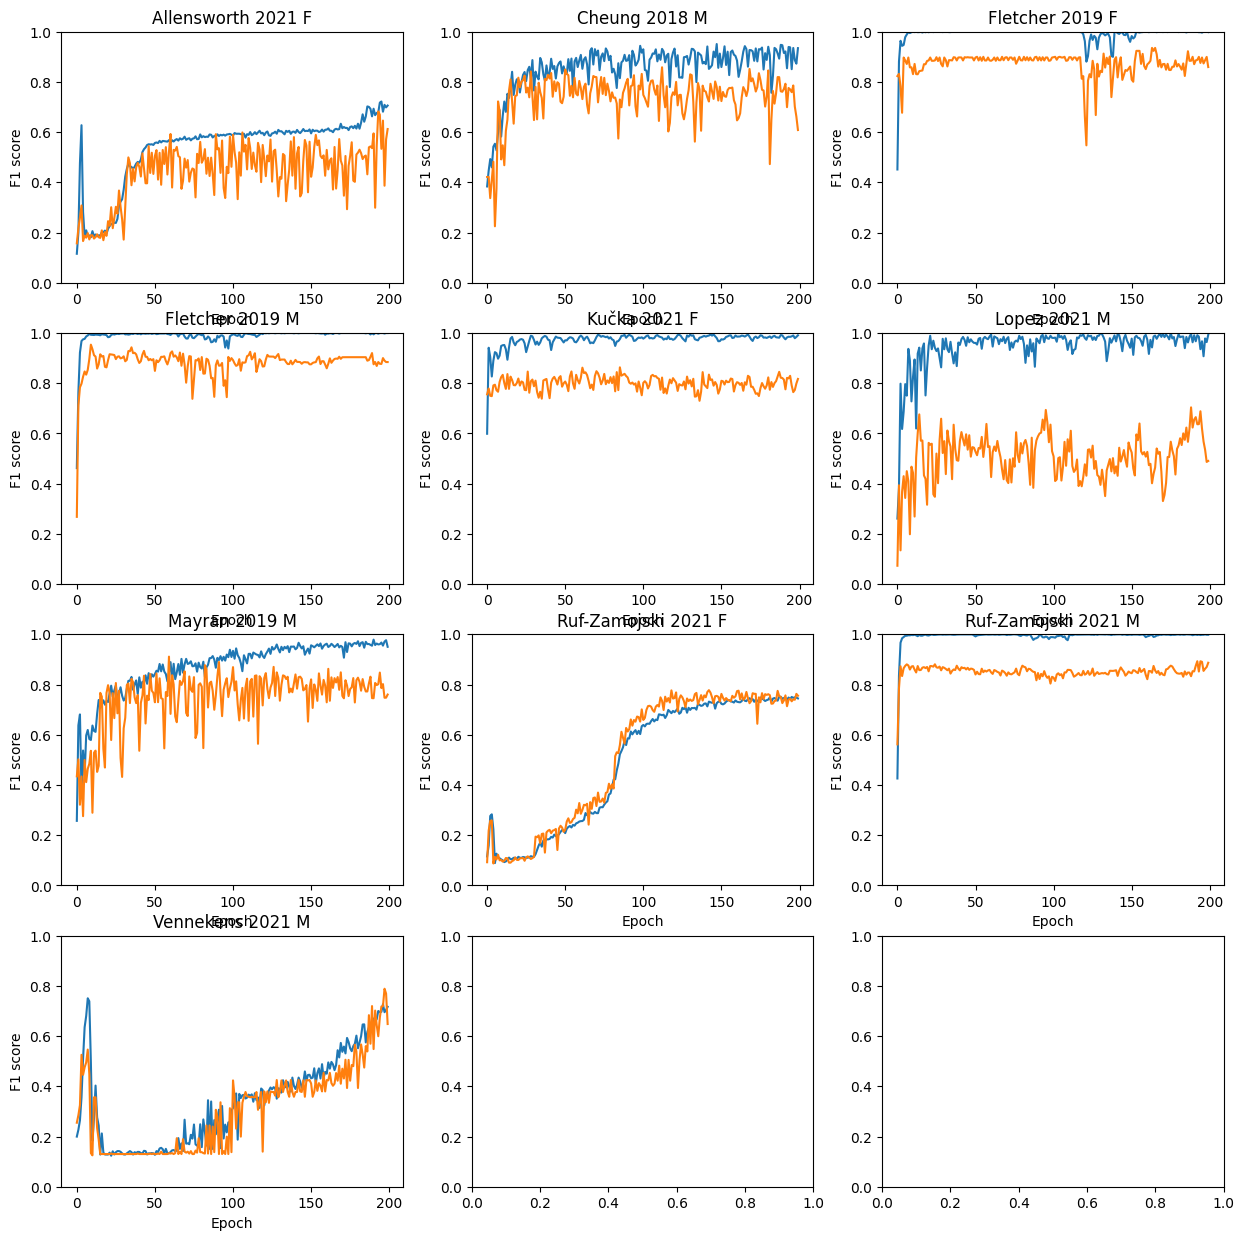

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

dataset_names = [f"{d['author']} {d['year']} {d['sex']}" for _, d in datasets.iterrows()]
dataset_names = np.unique(dataset_names)
for i, d in enumerate(dataset_names):
    a = ax.ravel()[i]
    a.plot(trainer.training_histories[i]['f1_score'])
    a.plot(trainer.training_histories[i]['val_f1_score'])
    a.set_title(d)
    a.set_ylim([0, 1])
    a.set_xlabel('Epoch')
    a.set_ylabel('F1 score')

1/1 [==============================] - 0s 16ms/step - loss: 22.3188 - f1_score: 0.5317


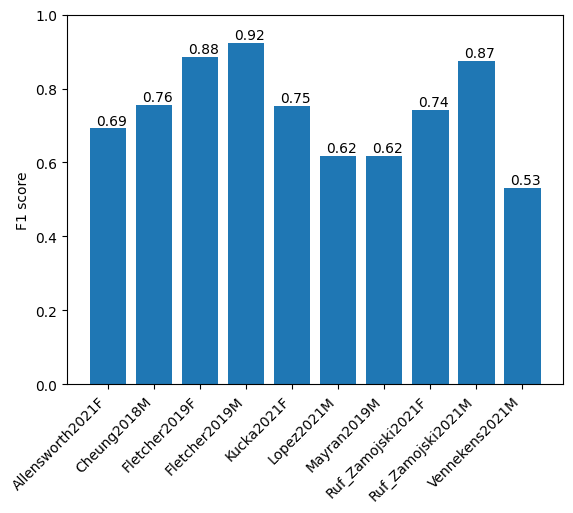

0.69
0.76
0.88
0.92
0.75
0.62
0.62
0.74
0.87
0.53


In [7]:
eval_res = trainer.evaluate_models()

f1 = [r[1] for r in eval_res.values()]
plt.bar(np.arange(len(eval_res)), f1, tick_label=list(eval_res.keys()))
for i, v in enumerate(f1):
    plt.text(i - 0.25, v + 0.01, f"{v:.2f}")
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.ylabel('F1 score')
plt.show()

for f in f1:
    print(f"{f:.2f},", end="\n")